# uSEIR model - Fits 

In this NB we show the performance of the uSEIR and uSEIRq (quenched) chi2 and MLL fits.

We generate a pandemic and fit, using chi2 and MLL, to the pandemic model: uSEIR, uSEIRq.

Version: 2

Authors: JAH, JJG

Date: 07-07-20

In [1]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Tue Jul  7 16:51:05 2020


In [2]:
import numpy as np
import pandas as pd
import matplotlib

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
plt.style.context('seaborn-colorblind');

In [4]:
import scipy.stats  as stats

#from scipy.integrate import odeint
#import scipy.integrate as spi
#from scipy.interpolate import interp1d

In [5]:
import c19.cfit         as cfit
import c19.useir        as us
import c19.useir_plot   as usp

npa = np.array


In [6]:
import warnings
warnings.filterwarnings("ignore")

## uSEIR

We generate the distribution of the deaths using uSEIR model

TOTO: define the parameters


### generation

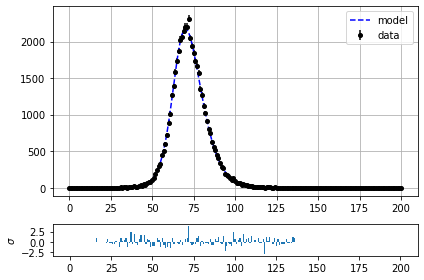

In [7]:
t0, beta, tr, ti, tm, nn, phi   = 0., 4./3., 3., 5., 9., 1e6, 0.05
pars   = (t0, beta, ti, tr, tm, nn, phi)
fmodel = us.dms_t0useir

times, xdata = us.rvs(pars, fmodel)
xs, ys       = xdata

usp.plt_data_model(xs, ys, pars, fmodel)
#plt.xlim((0., 100));

### Chi2 fit

In [8]:
pmask       = (False, True, False, True, False, False, False)
phat, fval, ffun  = us.dms_fit(xs, ys, fmodel, pars, pmask)

best estimate : [1.24953813 3.45652843] , chi2 : 111.2609221902969 , Delta Chi2 : 2.7156791984015314


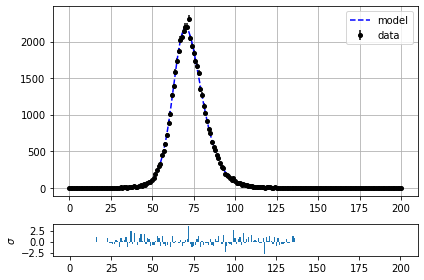

In [9]:
print('best estimate :', phat[npa(pmask)], ', chi2 :', fval, ', Delta Chi2 :', ffun(pars) - fval)
usp.plt_data_model(xs, ys, phat, fmodel)

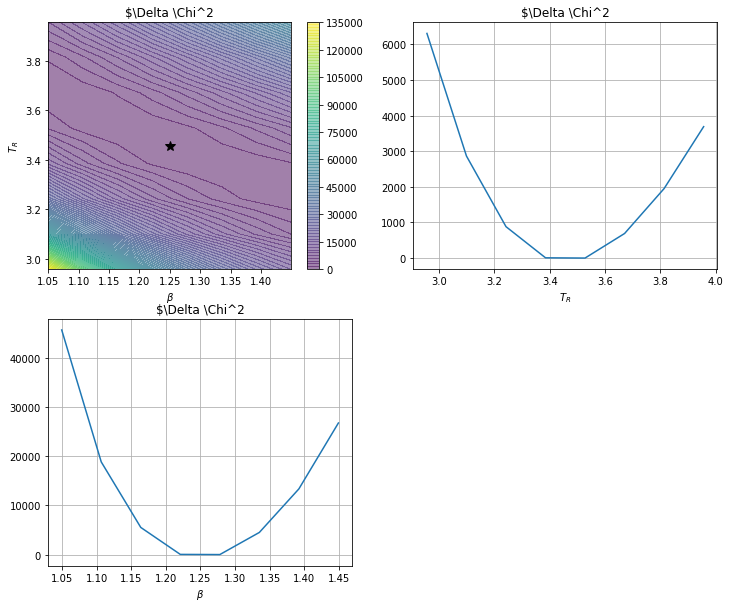

In [10]:
index0, index1 = 1, 3
bhat, that = phat[index0], phat[index1]
betas   = np.linspace(bhat - 0.2, bhat + 0.2, 8)
trs     = np.linspace(that - 0.5, that + 0.5, 8)
usp.plt_ffit_scan(ffun, phat, betas, trs, index0, index1, r'$\beta$', r'$T_R$', r'$\Delta \Chi^2', levels = 100)

In [11]:
#usp.plt_ffit_scan(fchi2, pars, betas, trs, 1, 3, r'$\beta$', r'$T_R$', r'$\chi^2$', levels = 100)

### MLL Fit

In [12]:
pmask       = (False, True, False, True, False, False, False)
phat, fval, ffun  = us.dms_fit(xs, ys, fmodel, pars, pmask, ffit = 'mll')

best estimate : [1.32092031 3.0548488 ] , mll : 370184.8568791295 , Delta mll : 1.3266067480435595


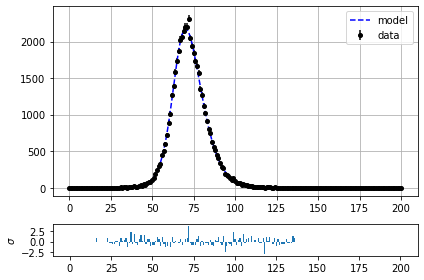

In [13]:
print('best estimate :', phat[npa(pmask)], ', mll :', fval, ', Delta mll :', ffun(pars) - fval)
usp.plt_data_model(xs, ys, phat, fmodel)

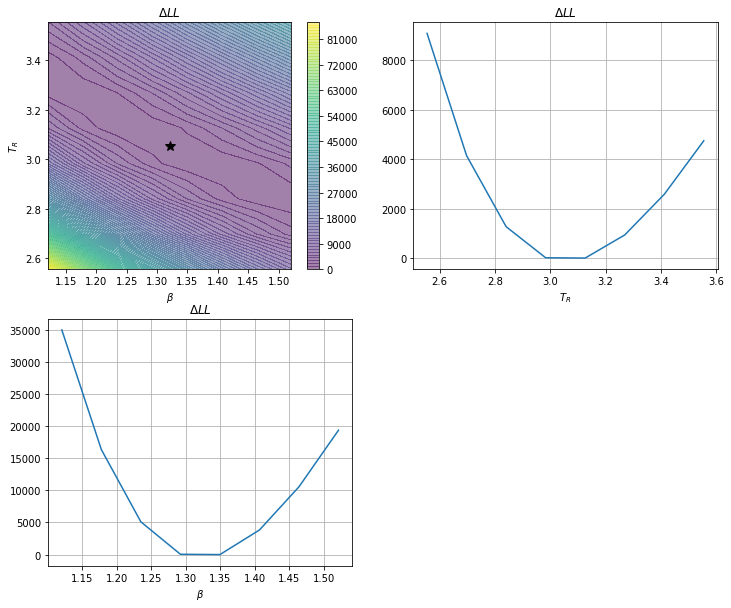

In [14]:
index0, index1 = 1, 3
bhat, that = phat[index0], phat[index1]
betas   = np.linspace(bhat - 0.2, bhat + 0.2, 8)
trs     = np.linspace(that - 0.5, that + 0.5, 8)
usp.plt_ffit_scan(ffun, phat, betas, trs, index0, index1, r'$\beta$', r'$T_R$', r'$\Delta LL$', levels = 100)

### test t0 

In [15]:
pars    = (t0, beta, ti, tr, tm, nn, phi)
pmask   = (True, False, False, False, False, False, False)
yys = np.copy(ys)
t0  = 10
yys[t0:] = ys[:-t0]; yys[-t0:] = 0
phat, fval, ff = us.dms_fit(xs, yys, fmodel, pars, pmask)

best estimate : [0.] , fval : 96581.03893051064 , Delta f : 0.0


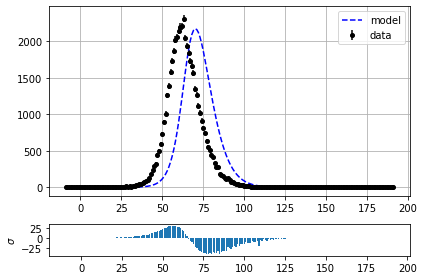

In [16]:
print('best estimate :', phat[npa(pmask)], ', fval :', fval, ', Delta f :', ff(pars) - fval)
usp.plt_data_model(xs - 9., ys, phat, fmodel)

In [17]:
#TODO - improve t0 determination

## uSEIR quenched 

### generation

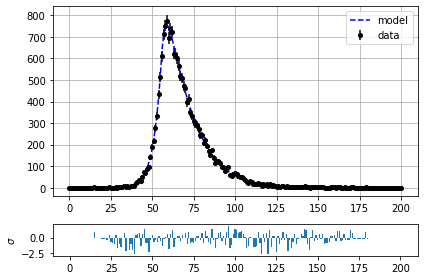

In [18]:
t0, beta, gamma, tr, ti, tm, nn, phi, s1   = 0., 4./3., 0.8/3., 3., 5., 9., 1e6, 0.05, 0.15
pars   = (t0, beta, gamma, ti, tr, tm, nn, phi, s1)
fmodel = us.dms_t0useirq

times, xdata = us.rvs(pars, fmodel)
xs, ys       = xdata

usp.plt_data_model(xs, ys, pars, fmodel)
#plt.xlim((0., 100));

### Chi2 Fit

In [19]:
pmask       = (False, True, True, False, True, False, False, False, False)
phat, fval, ffun  = us.dms_fit(xs, ys, fmodel, pars, pmask)

best estimate : [1.229052   0.21504293 3.58835442] , fval : 147.7869844668298 , Delta f : 12.44201546559131


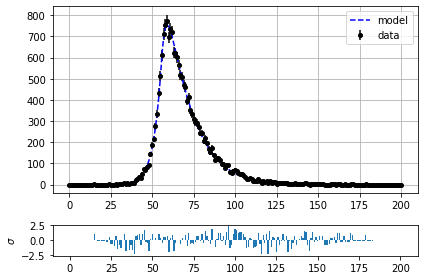

In [20]:
print('best estimate :', phat[npa(pmask)], ', fval :', fval, ', Delta f :', ffun(pars) - fval)
usp.plt_data_model(xs, ys, phat, fmodel)

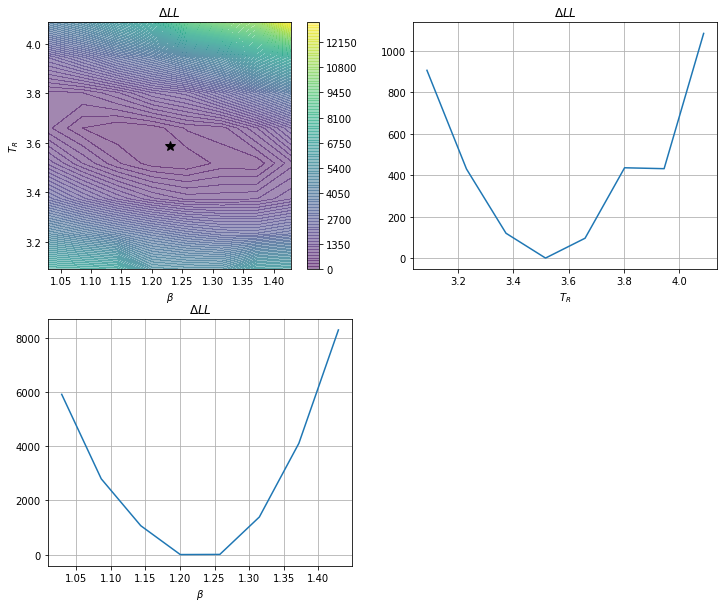

In [21]:
index0, index1 = 1, 4
bhat, that = phat[index0], phat[index1]
betas   = np.linspace(bhat - 0.2, bhat + 0.2, 8)
trs     = np.linspace(that - 0.5, that + 0.5, 8)
usp.plt_ffit_scan(ffun, phat, betas, trs, index0, index1, r'$\beta$', r'$T_R$', r'$\Delta LL$', levels = 100)

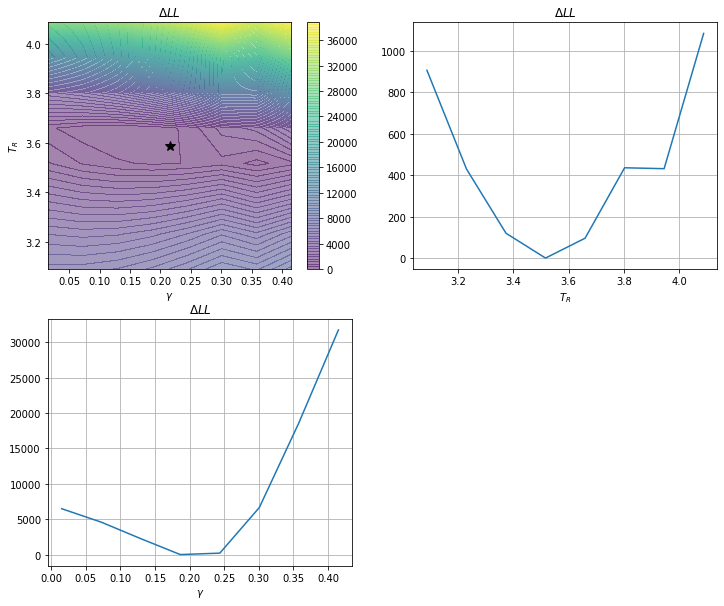

In [22]:
index0, index1 = 2, 4
bhat, that = phat[index0], phat[index1]
betas   = np.linspace(bhat - 0.2, bhat + 0.2, 8)
trs     = np.linspace(that - 0.5, that + 0.5, 8)
usp.plt_ffit_scan(ffun, phat, betas, trs, index0, index1, r'$\gamma$', r'$T_R$', r'$\Delta LL$', levels = 100)

### MLL fit

In [23]:
pmask       = (False, True, True, False, True, False, False, False, False)
phat, fval, ffun  = us.dms_fit(xs, ys, fmodel, pars, pmask, ffit = 'mll')

best estimate : [1.29275002 0.25017836 3.23311663] , fval : 145623.42175504213 , Delta f : 2.545640921103768


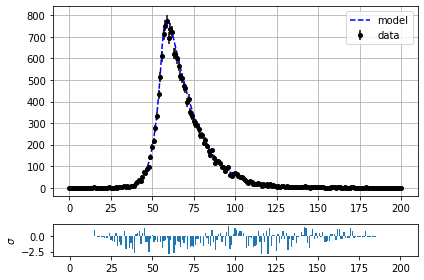

In [24]:
print('best estimate :', phat[npa(pmask)], ', fval :', fval, ', Delta f :', ffun(pars) - fval)
usp.plt_data_model(xs, ys, phat, fmodel)

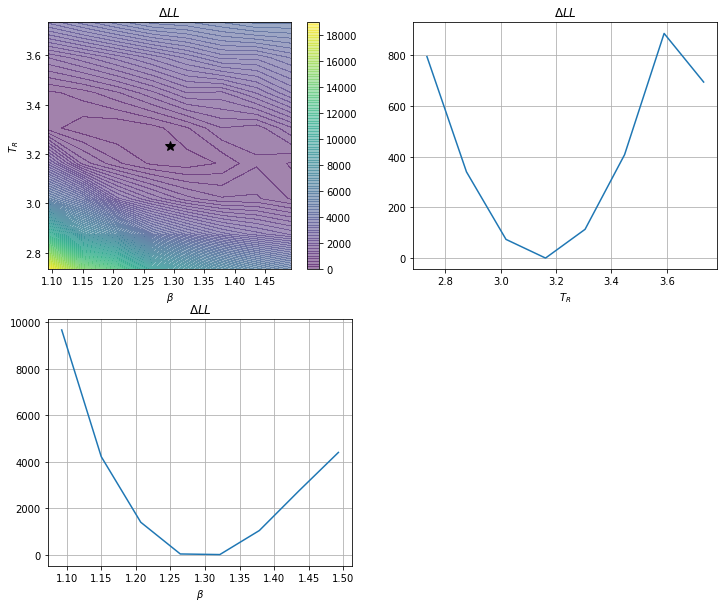

In [25]:
index0, index1 = 1, 4
bhat, that = phat[index0], phat[index1]
betas   = np.linspace(bhat - 0.2, bhat + 0.2, 8)
trs     = np.linspace(that - 0.5, that + 0.5, 8)
usp.plt_ffit_scan(ffun, phat, betas, trs, index0, index1, r'$\beta$', r'$T_R$', r'$\Delta LL$', levels = 100)

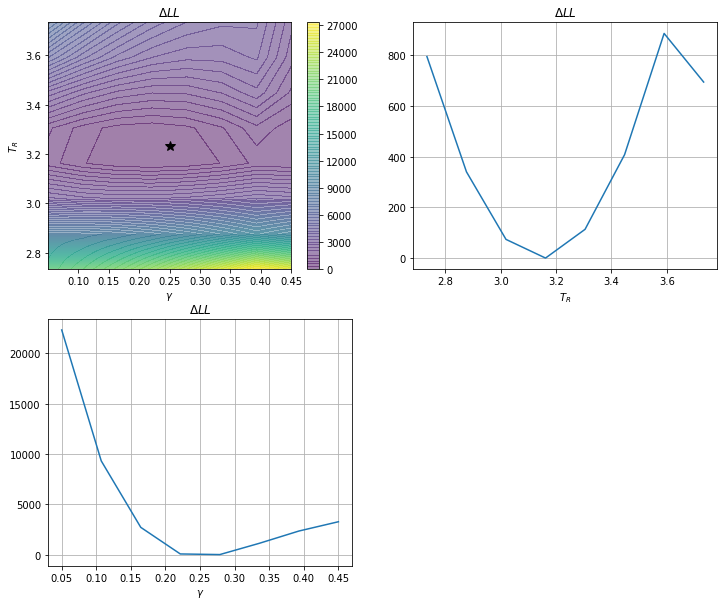

In [26]:
index0, index1 = 2, 4
bhat, that = phat[index0], phat[index1]
betas   = np.linspace(bhat - 0.2, bhat + 0.2, 8)
trs     = np.linspace(that - 0.5, that + 0.5, 8)
usp.plt_ffit_scan(ffun, phat, betas, trs, index0, index1, r'$\gamma$', r'$T_R$', r'$\Delta LL$', levels = 100)

### test t0

## Conclusions

- There is a correlation between beta and Tr (also between R0 and Tr)

- There is a strong correlation betting T0 and TR, TR tends to absorbs the value of T0. If you chande T0 to 0. then TR moves from 5 to 1.8 both in chi2 and mle and the model fits "nicely" the data. 

- Probe with an iterative method, providing 'reasonable' inputs